In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import ticker as ticker
from plotly import express as px
from plotly.offline import plot

In [11]:
covid_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
covid_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
covid_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [12]:
covid_confirmed['Country/Region'].replace('Mainland china','China',inplace=True)
covid_deaths['Country/Region'].replace('Mainland china','China',inplace=True)
covid_recovered['Country/Region'].replace('Mainland china','China',inplace=True)

In [14]:
covid_confirmed[['Province/State']] = covid_confirmed[['Province/State']].fillna('')
covid_confirmed[['Province/State']].fillna(0 , inplace = True)
covid_deaths[['Province/State']] = covid_deaths[['Province/State']].fillna('')
covid_deaths[['Province/State']].fillna(0 , inplace = True)
covid_recovered[['Province/State']] = covid_recovered[['Province/State']].fillna('')
covid_recovered[['Province/State']].fillna(0 , inplace = True)

C:\Users\M3MO\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [15]:
covid_confirmed = covid_confirmed.sort_values(by=['Country/Region'], ascending=True)
covid_deaths = covid_deaths.sort_values(by=['Country/Region'], ascending=True)
covid_recovered = covid_recovered.sort_values(by=['Country/Region'], ascending=True)

In [16]:
covid_confirmed_count = covid_confirmed.iloc[:, 4:].sum().max()
covid_deaths_count = covid_deaths.iloc[:, 4:].sum().max()
covid_recovered_count = covid_recovered.iloc[:, 4:].sum().max()

In [17]:
print('Total confirmed, dead and recovered numbers in the world respectively:' , 
      covid_confirmed_count,covid_deaths_count,covid_recovered_count)

Total confirmed, dead and recovered numbers in the world respectively: 14288689 602138 8027451


In [18]:
world_df = pd.DataFrame({
    'confirmed' : [covid_confirmed_count],
    'deaths' : [covid_deaths_count],
    'recovered' : [covid_recovered_count],
    'active' : [covid_confirmed_count - covid_deaths_count - covid_recovered_count]
})

In [19]:
print(world_df)

   confirmed  deaths  recovered   active
0   14288689  602138    8027451  5659100


In [20]:
world_long_df = world_df.melt(value_vars = ['active' , 'deaths' , 'recovered'],
                             var_name="status",
                             value_name="count")

world_long_df['upper']='confirmed'
print(world_long_df)

      status    count      upper
0     active  5659100  confirmed
1     deaths   602138  confirmed
2  recovered  8027451  confirmed


In [21]:
fig = px.treemap(world_long_df, path=["status"], values="count",
                color_discrete_sequence=['#3498db' , '#2ecc71' , '#e74c3c'],
                template='plotly_dark')
plot(fig)

'temp-plot.html'

In [22]:
covid_worldwide_confirmed=covid_confirmed.iloc[:, 4:].sum(axis=0)
covid_worldwide_deaths=covid_deaths.iloc[:, 4:].sum(axis=0)
covid_worldwide_recovered=covid_recovered.iloc[:, 4:].sum(axis=0)
covid_worldwide_active=covid_worldwide_confirmed-covid_worldwide_deaths-covid_worldwide_recovered

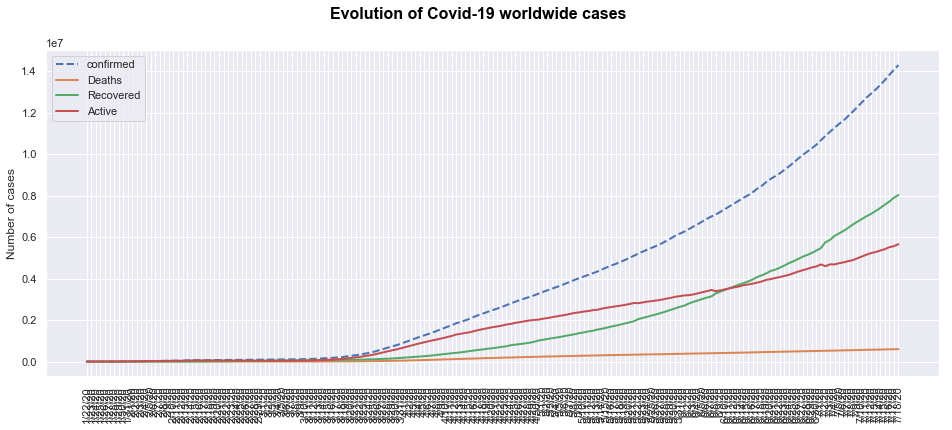

In [88]:
fig, ax = plt.subplots(figsize=(16,6))

sns.lineplot(x=covid_worldwide_confirmed.index,y=covid_worldwide_confirmed, sort=False , linewidth=2)
sns.lineplot(x=covid_worldwide_deaths.index,y=covid_worldwide_deaths, sort=False , linewidth=2)
sns.lineplot(x=covid_worldwide_recovered.index,y=covid_worldwide_recovered, sort=False , linewidth=2)
sns.lineplot(x=covid_worldwide_active.index,y=covid_worldwide_active, sort=False , linewidth=2)

ax.lines[0].set_linestyle("--")
plt.suptitle("Evolution of Covid-19 worldwide cases", fontsize=16, fontweight='bold' , color='black')
plt.xticks(rotation=90)
plt.ylabel('Number of cases')
ax.legend(['confirmed','Deaths','Recovered','Active'])
plt.show()

In [24]:
covid_worldwide_confirmed.describe()

count    1.790000e+02
mean     3.845613e+06
std      4.148197e+06
min      5.550000e+02
25%      1.039900e+05
50%      2.478129e+06
75%      6.561272e+06
max      1.428869e+07
dtype: float64

In [25]:
covid_worldwide_confirmed.var()

17207535247573.02

In [26]:
covid_worldwide_confirmed.mode()

0           555
1           654
2           941
3          1434
4          2118
5          2927
6          5578
7          6166
8          8234
9          9927
10        12038
11        16787
12        19887
13        23898
14        27643
15        30802
16        34395
17        37129
18        40159
19        42768
20        44810
21        45228
22        60381
23        66908
24        69050
25        71234
26        73269
27        75151
28        75651
29        76211
         ...   
149     8648529
150     8806084
151     8934624
152     9072483
153     9237825
154     9409002
155     9586894
156     9778240
157     9956354
158    10117985
159    10276558
160    10450456
161    10668149
162    10875852
163    11079351
164    11272923
165    11455621
166    11622965
167    11833815
168    12045624
169    12273853
170    12506434
171    12722764
172    12915440
173    13108223
174    13329678
175    13560803
176    13813333
177    14055299
178    14288689
Length: 179, dtype: int6

In [27]:
covid_worldwide_deaths.describe()

count       179.000000
mean     210670.296089
std      203436.301482
min          17.000000
25%        3509.500000
50%      173981.000000
75%      389659.500000
max      602138.000000
dtype: float64

In [28]:
covid_worldwide_deaths.var()

41386328760.53542

In [29]:
covid_worldwide_deaths.mode()

0          17
1          18
2          26
3          42
4          56
5          82
6         131
7         133
8         171
9         213
10        259
11        362
12        426
13        492
14        564
15        634
16        719
17        806
18        906
19       1013
20       1113
21       1118
22       1371
23       1523
24       1666
25       1770
26       1868
27       2008
28       2123
29       2248
        ...  
149    460989
150    465238
151    469201
152    472772
153    478083
154    483344
155    489971
156    494798
157    499284
158    502373
159    506094
160    511226
161    516237
162    521357
163    526352
164    530721
165    534166
166    537963
167    544070
168    549389
169    554847
170    560158
171    565055
172    569009
173    572824
174    578484
175    583977
176    589776
177    596518
178    602138
Length: 179, dtype: int64

In [30]:
covid_worldwide_recovered.describe()

count    1.790000e+02
mean     1.757791e+06
std      2.235409e+06
min      2.800000e+01
25%      5.711200e+04
50%      6.446110e+05
75%      2.910344e+06
max      8.027451e+06
dtype: float64

In [31]:
covid_worldwide_recovered.var()

4997055209384.633

In [32]:
covid_worldwide_recovered.mode()

0           28
1           30
2           36
3           39
4           52
5           61
6          107
7          126
8          143
9          222
10         284
11         472
12         623
13         852
14        1124
15        1487
16        2011
17        2616
18        3244
19        3946
20        4683
21        5150
22        6295
23        8058
24        9395
25       10865
26       12583
27       14352
28       16121
29       18177
        ...   
149    4250107
150    4365932
151    4434628
152    4526333
153    4630391
154    4746118
155    4838921
156    4945557
157    5051864
158    5140899
159    5235813
160    5353205
161    5469134
162    5754006
163    5863847
164    6059565
165    6179006
166    6302626
167    6447656
168    6605607
169    6740124
170    6879521
171    7005299
172    7116957
173    7257369
174    7399474
175    7559252
176    7711525
177    7894890
178    8027451
Length: 179, dtype: int64

In [33]:
covid_worldwide_active.describe()

count    1.790000e+02
mean     1.877152e+06
std      1.762787e+06
min      5.100000e+02
25%      5.736700e+04
50%      1.659537e+06
75%      3.261268e+06
max      5.659100e+06
dtype: float64

In [34]:
covid_worldwide_active.var()

3107418611887.9272

In [35]:
covid_worldwide_active.mode()

0          510
1          606
2          879
3         1353
4         2010
5         2784
6         5340
7         5907
8         7920
9         9492
10       11495
11       15953
12       18838
13       22554
14       25955
15       28681
16       31665
17       33707
18       36009
19       37809
20       38960
21       39014
22       40812
23       40884
24       41550
25       41673
26       42646
27       42674
28       43285
29       44091
        ...   
149    3937433
150    3974914
151    4030795
152    4073378
153    4129351
154    4179540
155    4258002
156    4337885
157    4405206
158    4474713
159    4534651
160    4586025
161    4600489
162    4682637
163    4682778
164    4689152
165    4742449
166    4782376
167    4842089
168    4890628
169    4978882
170    5066755
171    5152410
172    5229474
173    5278030
174    5351720
175    5417574
176    5512032
177    5563891
178    5659100
Length: 179, dtype: int64

In [47]:
covid_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/9/20', '7/10/20', '7/11/20', '7/12/20', '7/13/20', '7/14/20',
       '7/15/20', '7/16/20', '7/17/20', '7/18/20'],
      dtype='object', length=183)

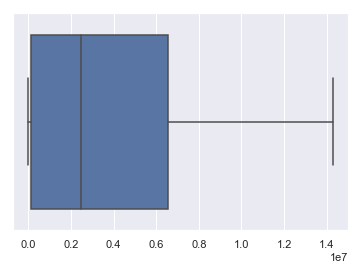

In [49]:
sns.boxplot(covid_worldwide_confirmed)

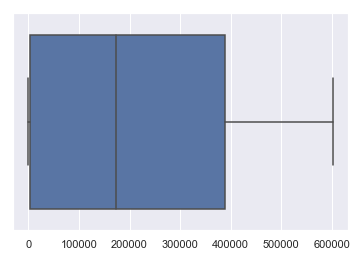

In [50]:
sns.boxplot(covid_worldwide_deaths)

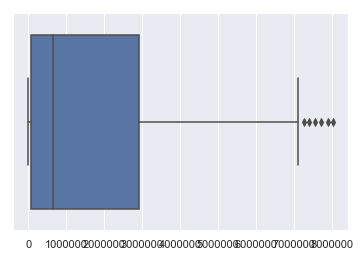

In [51]:
sns.boxplot(covid_worldwide_recovered)

In [54]:
covid_confirmed_sample=covid_confirmed.sample(20)
covid_deaths_sample=covid_deaths.sample(20)
covid_recovered_sample=covid_recovered.sample(20)

In [55]:
covid_confirmed_count_sample = covid_confirmed_sample.iloc[:, 4:].sum().max()
covid_deaths_count_sample = covid_deaths_sample.iloc[:, 4:].sum().max()
covid_recovered_count_sample = covid_recovered_sample.iloc[:, 4:].sum().max()

In [58]:
print('Total confirmed_sample, dead_sample and recovered_sample numbers in the world respectively:' , 
      covid_confirmed_count_sample,covid_deaths_count_sample,covid_recovered_count_sample)

Total confirmed_sample, dead_sample and recovered_sample numbers in the world respectively: 333352 10218 427628


In [61]:
world_df_sample = pd.DataFrame({
    'confirmed' : [covid_confirmed_count_sample],
    'deaths' : [covid_deaths_count_sample],
    'recovered' : [covid_recovered_count_sample],
    
})

In [62]:
print(world_df_sample)

   confirmed  deaths  recovered
0     333352   10218     427628


In [64]:
world_long_df_sample = world_df_sample.melt(value_vars = [ 'deaths' , 'recovered'],
                             var_name="status",
                             value_name="count")

world_long_df_sample['upper']='confirmed'
print(world_long_df_sample)

      status   count      upper
0     deaths   10218  confirmed
1  recovered  427628  confirmed


In [65]:
fig = px.treemap(world_long_df_sample, path=["status"], values="count",
                color_discrete_sequence=['#3498db' , '#2ecc71' , '#e74c3c'],
                template='plotly_dark')
plot(fig)

'temp-plot.html'

In [66]:
covid_worldwide_confirmed_sample=covid_confirmed_sample.iloc[:, 4:].sum(axis=0)
covid_worldwide_deaths_sample=covid_deaths_sample.iloc[:, 4:].sum(axis=0)
covid_worldwide_recovered_sample=covid_recovered_sample.iloc[:, 4:].sum(axis=0)
covid_worldwide_active_sample=covid_worldwide_confirmed_sample-covid_worldwide_deaths_sample-covid_worldwide_recovered_sample

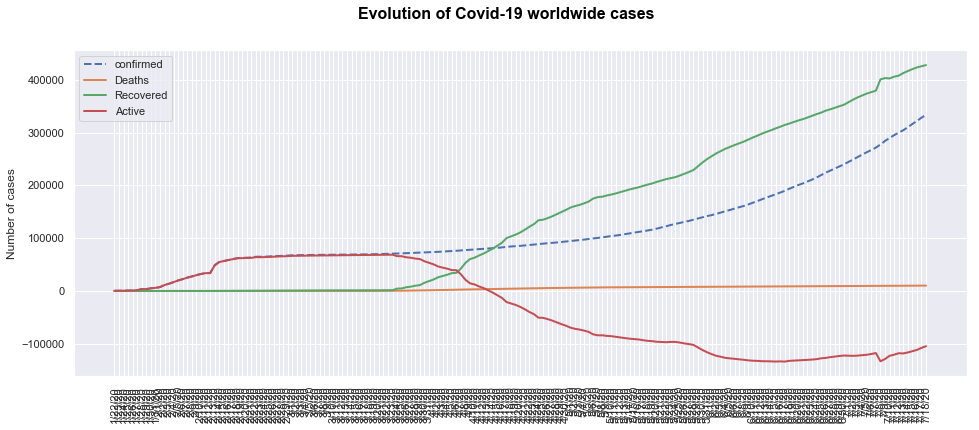

In [67]:
fig, ax = plt.subplots(figsize=(16,6))

sns.lineplot(x=covid_worldwide_confirmed_sample.index,y=covid_worldwide_confirmed_sample, sort=False , linewidth=2)
sns.lineplot(x=covid_worldwide_deaths_sample.index,y=covid_worldwide_deaths_sample, sort=False , linewidth=2)
sns.lineplot(x=covid_worldwide_recovered_sample.index,y=covid_worldwide_recovered_sample, sort=False , linewidth=2)
sns.lineplot(x=covid_worldwide_active_sample.index,y=covid_worldwide_active_sample, sort=False , linewidth=2)

ax.lines[0].set_linestyle("--")
plt.suptitle("Evolution of Covid-19 worldwide cases", fontsize=16, fontweight='bold' , color='black')
plt.xticks(rotation=90)
plt.ylabel('Number of cases')
ax.legend(['confirmed','Deaths','Recovered','Active'])
plt.show()

In [69]:
covid_worldwide_confirmed_sample.describe()

count       179.000000
mean     113558.502793
std       78831.404435
min         446.000000
25%       68384.500000
50%       85461.000000
75%      149762.000000
max      333352.000000
dtype: float64

In [70]:
covid_worldwide_confirmed_sample.var()

6214390325.116568

In [71]:
covid_worldwide_confirmed_sample.mode()

0    64788
dtype: int64

In [72]:
covid_worldwide_deaths_sample.describe()

count      179.000000
mean      4424.625698
std       3893.121384
min          0.000000
25%         46.000000
50%       4683.000000
75%       8216.000000
max      10218.000000
dtype: float64

In [73]:
covid_worldwide_deaths_sample.var()

15156394.111920144

In [74]:
covid_worldwide_deaths_sample.mode()

0    0
dtype: int64

In [75]:
covid_worldwide_recovered_sample.describe()

count       179.000000
mean     141116.078212
std      143176.821953
min           0.000000
25%        1160.500000
50%      110802.000000
75%      267066.000000
max      427628.000000
dtype: float64

In [76]:
covid_worldwide_recovered_sample.var()

20499602344.668003

In [77]:
covid_worldwide_recovered_sample.mode()

0    0
dtype: int64

In [78]:
covid_worldwide_active_sample.describe()

count       179.000000
mean     -31982.201117
std       78003.345050
min     -133628.000000
25%     -114976.000000
50%      -30024.000000
75%       55540.500000
max       68726.000000
dtype: float64

In [79]:
covid_worldwide_active_sample.var()

6084521839.004273

In [80]:
covid_worldwide_active_sample.mode()

0     -133628
1     -133535
2     -133217
3     -133164
4     -133021
5     -132991
6     -132854
7     -132257
8     -132226
9     -131965
10    -131733
11    -131278
12    -131068
13    -130732
14    -130207
15    -130152
16    -129805
17    -129375
18    -128986
19    -128762
20    -128330
21    -127566
22    -127418
23    -126637
24    -126548
25    -125147
26    -124492
27    -124166
28    -122949
29    -122740
        ...  
149     64626
150     64988
151     65346
152     65633
153     65845
154     65972
155     65993
156     66559
157     66708
158     66801
159     66893
160     67024
161     67137
162     67219
163     67280
164     67333
165     67394
166     67439
167     67454
168     67601
169     67706
170     67779
171     67849
172     67953
173     67977
174     68127
175     68207
176     68257
177     68550
178     68726
Length: 179, dtype: int64

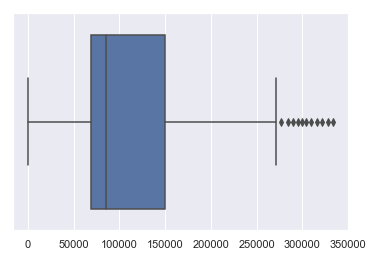

In [81]:
sns.boxplot(covid_worldwide_confirmed_sample)

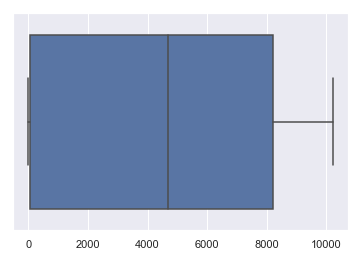

In [82]:
sns.boxplot(covid_worldwide_deaths_sample)

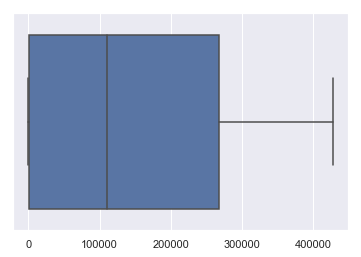

In [83]:
sns.boxplot(covid_worldwide_recovered_sample)

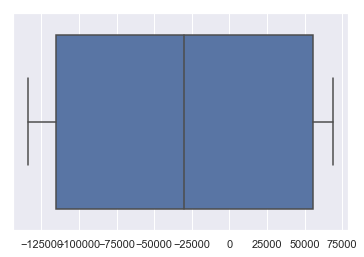

In [84]:
sns.boxplot(covid_worldwide_active_sample)